In [ ]:
!pip install librosa

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
# file_path = "S01_Chim Chim Cheree_lyrics.wav"
audio_file = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/full.v1/S01_Chim Chim Cheree_lyrics.wav"
y, sr = librosa.load(audio_file, sr=None)



In [ ]:
# Calculate the analytic signal using the Hilbert transform
analytic_signal = librosa.effects.preemphasis(y)

# Calculate the envelope (absolute value of the analytic signal)
envelope = np.abs(analytic_signal)

# Create a time array for the x-axis
times = librosa.times_like(envelope, sr=sr)



<ipython-input-13-474b82f57cdc>:3: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(envelope, sr=sr, alpha=0.5, x_axis='time', label='Envelope')


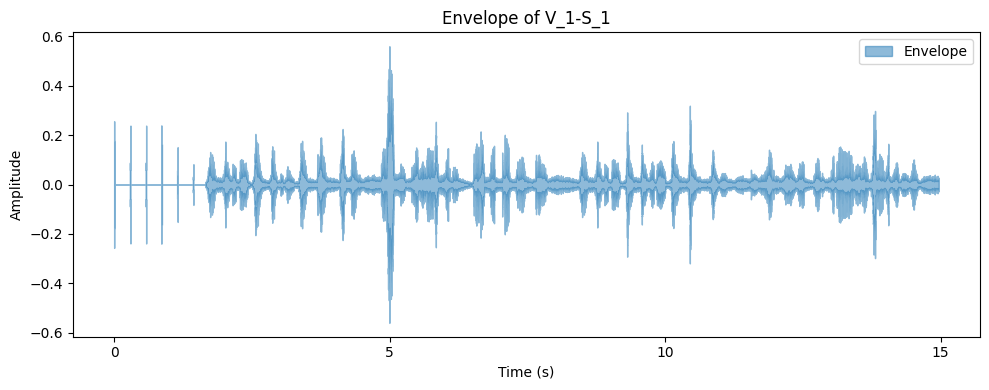

In [ ]:
# Plot the envelope
plt.figure(figsize=(10, 4))
librosa.display.waveshow(envelope, sr=sr, alpha=0.5, x_axis='time', label='Envelope')
# plt.xticks(np.arange(0, times[-1], 1), np.arange(0, int(times[-1]) + 1))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Envelope of V_1-S_1')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
print(len(y))
print("--")
print(sr)

659986
--
44100


## envelope generation as per stober:

Using the method described by O'Sullivan et al. (2015), we attempted to reconstruct and classify the audio envelopes shown in Figure 3. These envelopes were computed by applying the Hilbert transform to the mono audio signal of the stimuli, down-sampling to 64 Hz and low-pass filtering at 8 Hz.


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, butter, filtfilt, resample

# Load the audio file (replace with your audio file)
audio_file = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/full.v1/S01_Chim Chim Cheree_lyrics.wav"
y, sr = librosa.load(audio_file, sr=None)





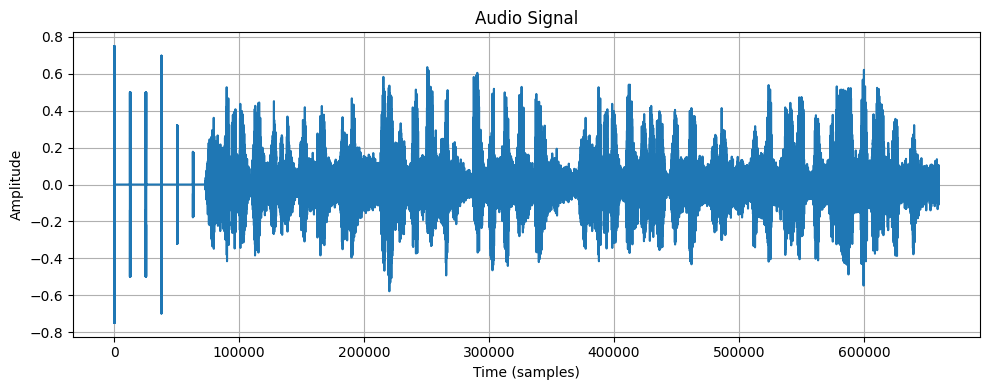

In [ ]:
# Plot the audio signal with samples on x axis
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

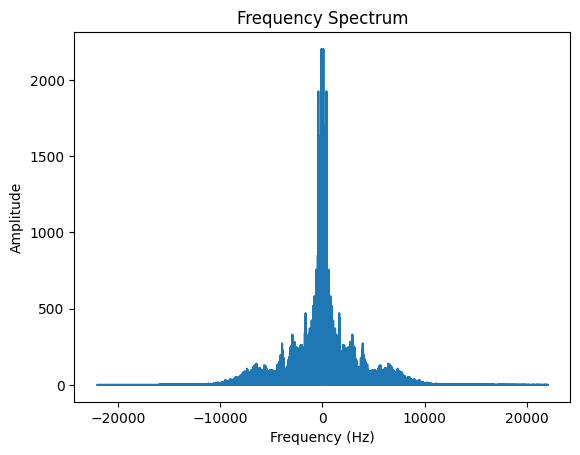

In [ ]:
# Apply FFT to the audio signal
fft_result = np.fft.fft(y)

num_points = len(fft_result)
frequencies = np.fft.fftfreq(num_points, 1/sr)

# Plot the spectrum
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.show()

In [ ]:
# Apply the Hilbert transform to obtain the analytic signal
analytic_signal = hilbert(y)

# Compute the envelope (absolute value of the analytic signal)
envelope = np.abs(analytic_signal)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


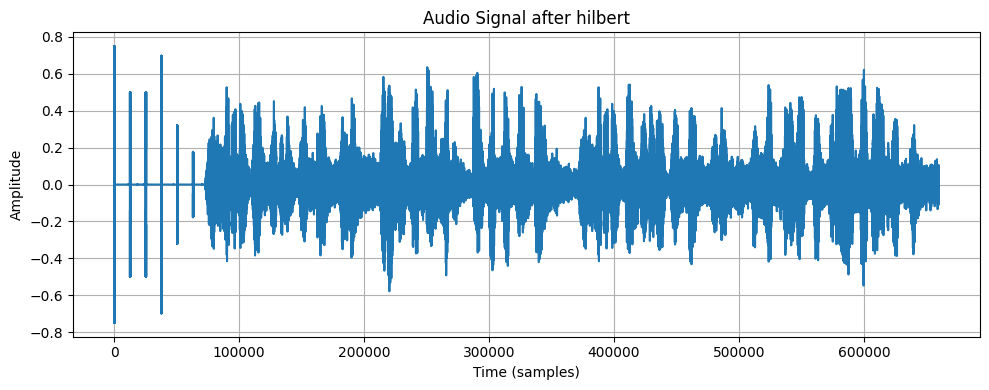

In [ ]:
# Plot the audio signal with samples on x axis
plt.figure(figsize=(10, 4))
plt.plot(a)
plt.xlabel('Time (samnalytic_signalples)')
plt.ylabel('Amplitude')
plt.title('Audio Signal after hilbert')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Downsample to 64 Hz
desired_sample_rate = 64
y_downsampled = resample(envelope, int(len(envelope) * desired_sample_rate / sr))

# Low-pass filter at 8 Hz
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y_filtered = filtfilt(b, a, data)
    return y_filtered

# Define the low-pass filter cutoff frequency (8 Hz)
cutoff_frequency = 8.0

# Apply the low-pass filter to the downsampled envelope
envelope_filtered = butter_lowpass_filter(y_downsampled, cutoff_frequency, desired_sample_rate)

# The 'envelope_filtered' variable now contains the envelope of the audio signal


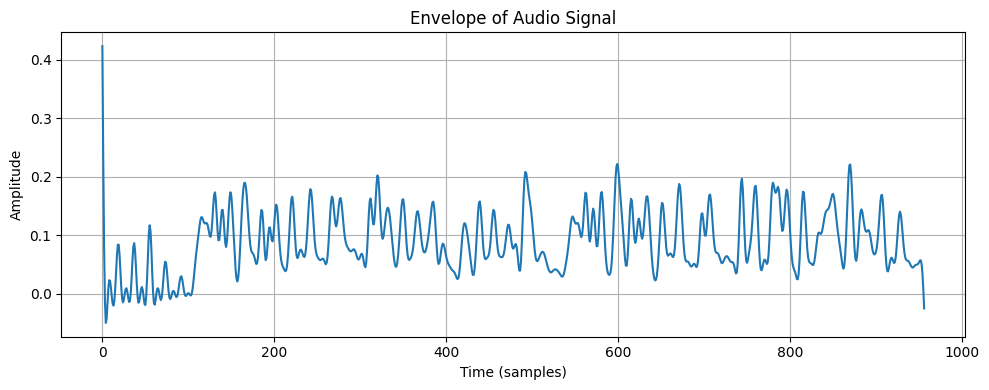

In [ ]:
# Plot the envelope
plt.figure(figsize=(10, 4))
plt.plot(envelope_filtered)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Envelope of Audio Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

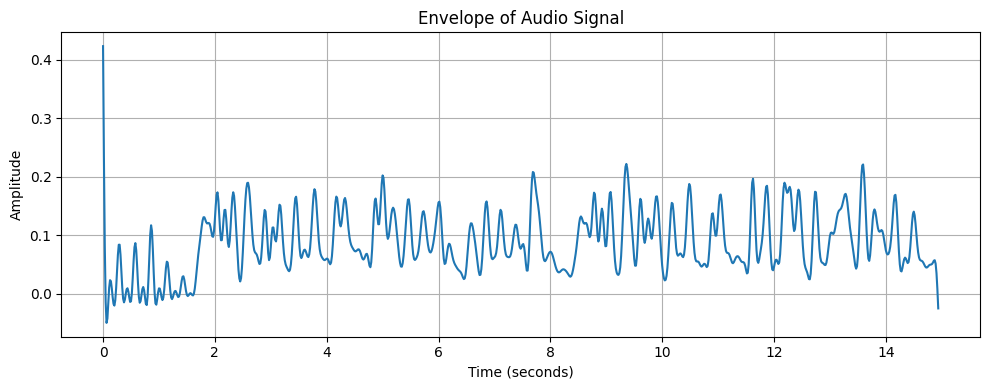

In [ ]:
# Calculate time values for the x-axis in seconds
time_seconds = np.arange(0, len(envelope_filtered)) / desired_sample_rate

# Plot the envelope with time in seconds on the x-axis
plt.figure(figsize=(10, 4))
plt.plot(time_seconds, envelope_filtered)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Envelope of Audio Signal')
plt.grid(True)
plt.tight_layout()
plt.show()